In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


class Point:
    def __init__(self, x=0, y=0):    
        x = x
        y = x


num_lines = 768
line_length = 0.12
angle = 0.04
tan_angle = np.tan(angle)


vertical_lines = np.zeros(num_lines)
for i in range(num_lines):
    vertical_lines[i] = i * line_length / (num_lines - 1)

# Define the rotated lines (assuming y-intercepts evenly spaced)
rotated_lines = np.zeros(num_lines)
for j in range(num_lines):
    rotated_lines[j] = j * line_length / (num_lines - 1) # Evenly spaced between 0 and 12 cm

# Calculate the intersection points
intersection_points = []
for c_i in vertical_lines:
    for b_j in rotated_lines:
        intersection = Point()
        intersection.x = c_i
        intersection.y = tan_angle * c_i + b_j
        intersection_points.append(intersection)

# Print the intersection points
for point in intersection_points:
    print("Intersection at (", point.x, ", ", point.y, ")")



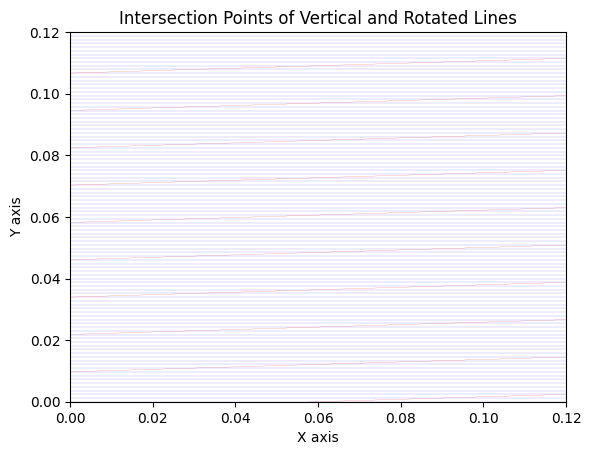

In [29]:


# Define parameters
num_lines = 100
line_length = 0.12  # 12 cm
angle = 0.04  # 40 mrad in radians
tan_angle = np.tan(angle)

# Define the vertical lines
x_vertical = np.linspace(0, line_length, num_lines)

# Define the rotated lines
y_intercepts = np.linspace(0, line_length, num_lines)

# Create figure and axis
fig, ax = plt.subplots()

# Plot vertical lines
for x in x_vertical:
    ax.plot([0, line_length], [x, x], 'b', linewidth=0.1)  # 'b' for blue

# Plot rotated lines (almost vertical)
for i, b in enumerate(y_intercepts):
    x_vals = np.array([0, line_length])
    y_vals = tan_angle * (x_vals - 0.06) + b  # Shift by 0.06 to ensure full overlap
    
    if i % 10 ==0 :
        ax.plot(x_vals, y_vals, 'r', linewidth=0.1)  # 'r' for red
    
    

# Calculate and plot intersection points
intersection_points_x = []
intersection_points_y = []

for x in x_vertical:
    for b in y_intercepts:
        y = tan_angle * (x - 0.06) + b  # Adjust for the shift
        intersection_points_x.append(x)
        intersection_points_y.append(y)

# ax.scatter(intersection_points_x, intersection_points_y, color='green')

# Set plot limits
ax.set_xlim(0, line_length)
ax.set_ylim(0, line_length)

# Labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Intersection Points of Vertical and Rotated Lines')

# Show plot
plt.show()


In [2]:
def DoRotation(xspan, yspan, RotRad=0):
    """Generate a meshgrid and rotate it by RotRad radians."""

    # Clockwise, 2D rotation matrix
    RotMatrix = np.array([[np.cos(RotRad),  np.sin(RotRad)],
                          [-np.sin(RotRad), np.cos(RotRad)]])

    x, y = np.meshgrid(xspan, yspan)
    return np.einsum('ji, mni -> jmn', RotMatrix, np.dstack([x, y]))

In [143]:
def get_line_params(xvals, yvals):
    dx = xvals[-1] - xvals[0]
    dy = yvals[-1] - yvals[0]
    
    if dx != 0 and dy != 0: # Regular line
        a = - dy / dx
        b = 1
        c = (yvals[0] + a * xvals[0])
        return a, b, c
    
    elif dx == 0:  # Vertical line x = c
        a = 1
        b = 0
        c = -xvals[0]
        return a, b, c
        
    elif dy == 0:   # Horizontal line y = c
        a = 0
        b = 1
        c = -yvals[0]
        return a, b, c


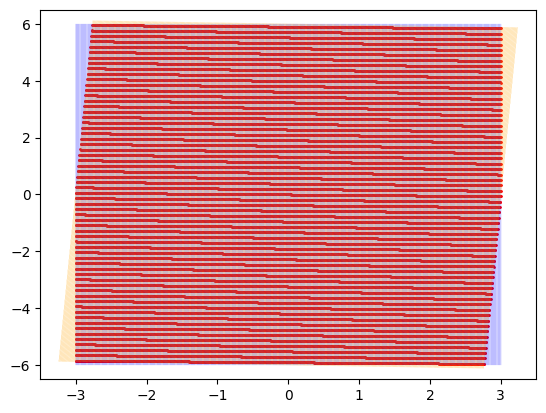

In [159]:
y = np.linspace(-6, 6, 789)
x = np.linspace(-3, 3, 789)

# coords_top = np.meshgrid(x, y)
coords_top = DoRotation(x, y, 0)
coords_bottom = DoRotation(x, y, 0.04)

top_line_params = [get_line_params(coords_top[0].T[i], coords_top[1].T[i]) for i in range(0, len(coords_top[0]))]
bottom_line_params = [get_line_params(coords_bottom[0].T[i], coords_bottom[1].T[i]) for i in range(0, len(coords_bottom[1]))]

x_intersection_points = []
y_intersection_points = []

for line1 in top_line_params:
    a1, b1, c1 = line1
    for line2 in bottom_line_params:
        a2, b2, c2 = line2
        
        # print("----")
        # print(f"{a1:<5.4f}, {b1:<5.4f}, {c1:<4.2f}")
        # print(f"{a2:<5.4f}, {b2:<5.4f}, {c2:<4.2f}")
        
        x_intercept = (b1*c2 - b2*c1) / (a1*b2 - a2*b1)
        y_intercept = (c1*a2 - c2*a1) / (a1*b2 - a2*b1)
        
        if abs(x_intercept) <= 3 and abs(y_intercept) <= 6:
            x_intersection_points.append(x_intercept)
            y_intersection_points.append(y_intercept)
            
            # print(x_intercept, y_intercept)
        
plt.scatter(x_intersection_points, y_intersection_points, color='red', s=1)
plt.plot(coords_top[0], coords_top[1], color='blue', linewidth=0.1)
plt.plot(coords_bottom[0], coords_bottom[1], color='orange', linewidth=0.1)
plt.xlim(-3.5, 3.5)
plt.ylim(-6.5, 6.5)

plt.savefig("test.pdf")
# for x, y in zip(x_intersection_points, y_intersection_points):
#     print(x,y)